### Using 2016 Video Game Sales Data to Guide 2017 Marketing Decisions
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

##### Business Ask

The goal of this project is to understand which factors contribute to a video game's commercial success so the Ice online store can make smarter marketing decisions. By analyzing 2016 sales data, we want to identify the genres, platforms, and game characteristics that attract the most buyers. These insights will help Ice prioritize which upcoming titles to promote, allocate advertising budgets more effectively, and focus on the segments most likely to drive strong sales in 2017.

In [57]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the dataset
games_url = "https://raw.githubusercontent.com/the-buike/game-sales-trends-2016-2017/refs/heads/main/games.csv"
games = pd.read_csv(games_url)

In [59]:
# Display the first few rows of the dataset
games.head(500)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,Super Mario World 2: Yoshi's Island,GBA,2002.0,Platform,1.75,0.45,0.62,0.09,NaN,NaN,NaN
496,Mass Effect,X360,2007.0,Role-Playing,1.83,0.79,0.03,0.27,91.0,8.7,M
497,Sonic Mega Collection Plus,PS2,2004.0,Misc,1.54,1.14,0.00,0.22,73.0,8.6,E
498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,0.08,1.24,1.13,0.45,93.0,9,E


In [60]:
# Display basic information about the dataset
def check_dataframe(df):
    print("DATAFRAME INFO")
    print("-" * 40)
    df.info()
    
    print("\n\nDATAFRAME DESCRIPTION")
    print("-" * 40)
    display(df.describe())
    print("\n\nDATAFRAME SHAPE")
    print("-" * 40)
    display(df.shape)

check_dataframe(games)

DATAFRAME INFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


DATAFRAME DESCRIPTION
----------------------------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000




DATAFRAME SHAPE
----------------------------------------


(16715, 11)

In [61]:
# Check for missing values in the dataset
def missing_values(df):
    print("MISSING VALUES")
    print("-" * 40)
    total = len(df)
    missing = total - df.count()
    return missing

missing_values(games)

MISSING VALUES
----------------------------------------


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [62]:
# Check for duplicate entries
def check_duplicates(df):
    print("DUPLICATE ENTRIES")
    print("-" * 40)
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate entries: {duplicates}")

check_duplicates(games)


DUPLICATE ENTRIES
----------------------------------------
Number of duplicate entries: 0


#### Initial Data Review Summary

The dataset contains 16,715 unique game records, and no duplicate rows were found, ensuring each entry represents a distinct title. The overall structure is stable, and the dataset is suitable for analysis.

The data includes a mix of text fields (name, genre, platform, rating) and numeric fields (regional sales, critic score, user score, release year). A few datatype issues need attention. The Year_of_Release column is currently stored as a float, which occurs because missing values force pandas to treat the entire column as decimal. Since years should be whole numbers, this column will need to be converted to integer after the missing years are handled.

The Critic_Score column also appears as float, but all values follow a 00.0 format, indicating they represent normalized percentage style scores on a 0–100 scale. These should be converted to integer as part of the cleaning process.

While reviewing User_Score, a notable inconsistency appeared. The column is stored as an object instead of a numeric type, which triggered further investigation. Inspecting the values revealed that in addition to numeric ratings like 4.3 or 7.8, the column contains non numeric placeholders such as "tbd" (to be determined). These entries prevent the column from being recognized as numeric. This confirms that User_Score should remain a float, but the non numeric entries must be cleaned or replaced before conversion.

A few missing values were identified: 2 missing names, 2 missing genres, and 269 missing release years, which will impact time based analysis. Larger gaps appear in the review related fields, with over 8,500 missing critic scores, more than 6,700 missing user scores, and a similar number of missing ESRB ratings. These gaps are expected, as not all games receive reviews or official ratings.

Overall, the dataset is in good condition. The primary cleaning steps will involve resolving missing year values, converting the year and critic score columns to the correct datatypes, addressing non numeric user score entries, and standardizing column naming for consistency.

Overall, the dataset is in good shape for exploration. The main issues to address include:

* the float format of the year field and Critic_score

* the missing year values

* the few missing names/genres

* and the inconsistent naming format across columns

In [63]:
#Make a copy of the dataframe
games_df = games.copy()
display(games_df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [64]:
# Convert column names to lowercase
games.columns = [col.lower() for col in games.columns]

# Verify the changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [65]:
# Check current data types
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [66]:
#Change the year_of_release and critic_score column to integer type with function
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games.dtypes
# Verify the changes
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [72]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
#Figure out why user_score is in object type
games['user_score'].unique()


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [68]:
(games['user_score'] == 'tbd').sum()

np.int64(2424)

#### Summary of Findings For "User_score"

During the initial audit of the dataset, one key quality issue surfaced in the User_Score column. While user ratings should be numeric values on a 0–10 scale, the column is stored as an object type. A closer inspection showed that alongside valid numeric ratings (such as 4.3 or 7.8), the dataset also contains non numeric placeholders labeled "tbd" (to be determined). These entries typically appear when a game has not yet received enough user ratings to generate a score.

The presence of "tbd" values explains why the column did not automatically convert to a numeric datatype. Importantly, this is a common characteristic of video game review datasets. Not all titles receive user reviews, especially niche games, less popular releases, or titles launched late in the year.

##### Decision

After reviewing industry standards and considering the goals of this project, the decision is not to drop any rows containing "tbd". Removing these entries would eliminate 2,424 games, which would bias the analysis toward only the most popular and highly reviewed titles. This would distort the overall picture of the market and reduce the reliability of any insights used to plan advertising strategies for 2017.

Instead, the chosen approach is to:

* Convert all non numeric entries, including "tbd", to NaN

This keeps the dataset intact while making the User_Score column fully numeric and ready for analysis.

* Retain all rows, even those without user ratings

Missing user scores are normal and expected, and they do not prevent meaningful analysis of other features such as genre, platform, critic score, or sales.

* Treat missing user ratings as part of the real landscape

The absence of user feedback itself can be informative. It often reflects low visibility or limited player engagement, which are important factors in game performance.

In [71]:
#force convert user_score to numeric, setting errors='coerce' to handle 'tbd' values
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].dtype

dtype('float64')

Next we will examine missing values to determine what to do with them

In [73]:
#check for missing values again after conversion
missing_values(games)

MISSING VALUES
----------------------------------------


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [86]:
# Calculate percentage of missing values
total_rows = len(games)
missing_percentage = (missing_values(games) / total_rows) * 100
missing_percentage

MISSING VALUES
----------------------------------------


name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64

### Summary of Missing Data Decisions

A review of missing values shows that only a small number of essential fields are incomplete. Rows missing a game name (2) or genre (2) will be removed, since these identifiers are required for any meaningful analysis.

All other missing values will be kept. This includes the 269 missing release years, 8,578 missing critic scores, and 9,125 missing user scores. These gaps are considered normal in video game datasets, where not all titles receive reviews or ratings. Removing these rows would eliminate a large portion of the dataset and create significant bias toward only well reviewed or popular games.

Keeping these rows ensures that the analysis reflects the full landscape of the market and maintains the integrity of trends across genres, platforms, and regions.

In [87]:
# Handle missing values based on analysis
# function that prints missing rows in object type columns
def show_missing_rows(df, column):
    """
    Print and return all rows where the given column is missing.
    Only intended for object (string) columns.
    """
    if df[column].dtype != "O":
        print(f"Warning: {column} is not an object column. Current dtype: {df[column].dtype}")
    
    missing_rows = df[df[column].isna()]
    
    print(f"Column: {column}")
    print(f"Number of missing rows: {missing_rows.shape[0]}")
    print("\nSample of rows with missing values:")
    print(missing_rows.head())
    
    return missing_rows

# Check missing rows in 'name' column
show_missing_rows(games, 'name')
show_missing_rows(games, 'genre')



Column: name
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Column: genre
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Findings

The rows with missing values in the Name column are the same rows that have missing values in the Genre column. Since both issues occur in the exact same entries, dropping the missing rows for Name automatically resolves the missing values for Genre as well. No additional drops are required for Genre.

In [85]:
#Drop missing rows in 'name' and 'genre' columns
games = games.dropna(subset=['name', 'genre'])

show_missing_rows(games, 'name')
show_missing_rows(games, 'genre')

Column: name
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Column: genre
Number of missing rows: 0

Sample of rows with missing values:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Key Insight

Because both the Name and Genre are missing in the same rows, it strongly suggests the issue is not random but tied to those specific entries being incomplete or corrupted.

And since a game without a name or genre has no analytical value, dropping them was the appropriate and industry standard action.

## Next steps

With the initial data quality checks and cleaning decisions completed, the next phase of the analysis will focus on preparing the dataset for deeper exploration. The first step will be to create a Total_Sales column by combining regional sales figures. This will provide a single, consolidated metric that captures each game's overall commercial performance.

This metric will be used throughout the exploratory analysis to understand overall commercial performance across titles, genres, platforms, and regions.

To ensure accuracy, Total Sales will not be rounded during the data preparation phase. Sales values in the dataset are expressed in millions and often include meaningful decimal precision. Small differences, such as 1.54 million versus 1.49 million, can impact comparisons between games and influence trend interpretations. Rounding too early would reduce detail and may introduce distortions in summary statistics, rankings, or visual insights.

Once the total sales metric is in place, we will begin the exploratory data analysis (EDA) phase. This will include examining sales distributions, identifying high performing genres and platforms, and evaluating patterns across different regions. These insights will help us understand market behavior, highlight growth opportunities, and guide strategic decisions for planning future game promotions and advertising efforts.

In [89]:
# Calculate for total sales column
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Next step

With the Total Sales column created, we will now begin a temporal analysis to understand how game sales have changed over the years within this dataset. By examining sales trends across different release periods, we can see how the market represented in our data has evolved and identify patterns that may inform planning for upcoming game promotions.

In [90]:
# Create a DataFrame with game releases by year
games_by_year = games.groupby('year_of_release').size().reset_index(name='number_of_games')
games_by_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


C:\Users\bukky\AppData\Local\Temp\ipykernel_11176\255428230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=games_by_year, x='year_of_release', y='number_of_games', palette='viridis')


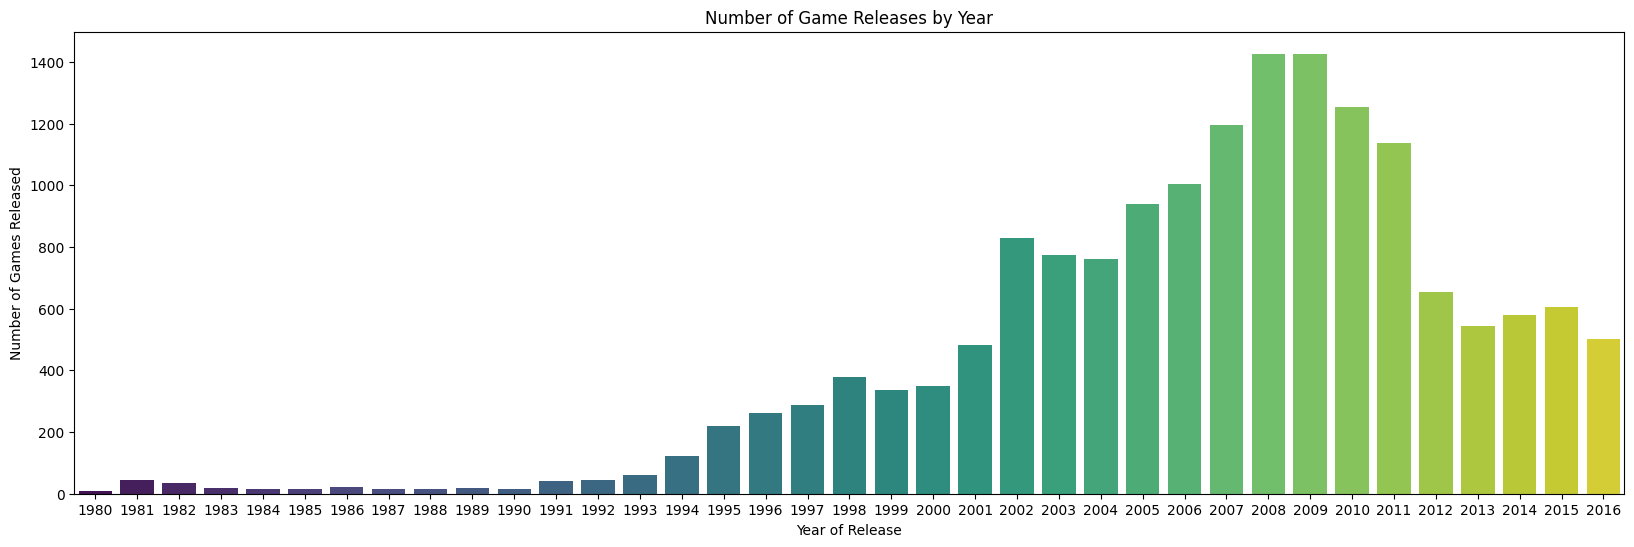

In [93]:
## Visualize the distribution of games across years
plt.figure(figsize=(20, 6))
sns.barplot(data=games_by_year, x='year_of_release', y='number_of_games', palette='viridis')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()

#### Game Releases Over Time - Summary

Looking at the number of game releases each year in this dataset, there's a pretty clear pattern. Things start slow in the early 80s and 90s, then releases really explode in the 2000s. The busiest stretch is 2005 to 2010 - we're talking hundreds of titles every year, with 2008 hitting over 1,400 games.

After that peak, things start dropping off. By 2016, we're down to around 500 games. Could be shifts in how games are made, Introduction of new modes of gaming (like mobile device gaming), changes in distribution, or just how this dataset tracks things.

For what we're doing, this trend matters because it shows us what the landscape looks like going into 2017. The market's not nearly as packed as it was during that mid-2000s boom, so new titles coming to the store actually have a better shot at getting noticed. Good context to have as we figure out which games are worth pushing in 2017.

In [94]:
# Display summary statistics for each year
games.groupby('year_of_release').agg({
    'total_sales': ['mean', 'median', 'sum'],
    'critic_score': ['mean', 'median'],
    'user_score': ['mean', 'median']
}).reset_index()

year_of_release total_sales                critic_score        user_score  \
                          mean median     sum         mean median       mean   
0             1980    1.264444  0.770   11.38         <NA>   <NA>        NaN   
1             1981    0.775652  0.465   35.68         <NA>   <NA>        NaN   
2             1982    0.802222  0.540   28.88         <NA>   <NA>        NaN   
3             1983    0.988235  0.770   16.80         <NA>   <NA>        NaN   
4             1984    3.596429  1.485   50.35         <NA>   <NA>        NaN   
5             1985    3.853571  1.015   53.95         59.0   59.0   5.800000   
6             1986    1.765714  1.360   37.08         <NA>   <NA>        NaN   
7             1987    1.356250  0.885   21.70         <NA>   <NA>        NaN   
8             1988    3.147333  1.510   47.21         64.0   64.0   2.200000   
9             1989    4.320588  1.610   73.45         <NA>   <NA>        NaN   
10            1990    3.085625  1.520   49.37         <NA>   <NA>        NaN   
11            1991    0.786098  0.380   32.23         <NA>   <NA>        NaN   
12            1992    1.771163  0.790   76.16         85.0   85.0   8.200000   
13            1993    0.766500  0.355   45.99         <NA>   <NA>        NaN   
14            1994    0.654793  0.270   79.23         69.0   69.0   6.300000   
15            1995    0.402374  0.140   88.12         <NA>   <NA>        NaN   
16            1996    0.757224  0.210  199.15       89.875   91.0   8.400000   
17            1997    0.695744  0.280  201.07    85.294118   85.0   8.472222   
18            1998    0.676280  0.260  256.31    81.821429   84.0   8.506452   
19            1999    0.742929  0.305  251.11    75.769231   80.0   8.480645   
20            2000    0.576171  0.250  201.66     69.34965   72.0   7.531776   
21            2001    0.687676  0.250  331.46     71.41411   73.0   7.594942   
22            2002    0.476441  0.170  394.97    69.046252   71.0   7.585129   
23            2003    0.461342  0.190  357.54    70.181197   71.0   7.859884   
24            2004    0.549449  0.210  418.68    69.393939   70.0   7.750511   
25            2005    0.487561  0.170  457.82    68.819847   70.0   7.509605   
26            2006    0.514622  0.110  517.71     67.33871   69.0   7.247283   
27            2007    0.505221  0.150  604.75    66.180636   68.0   6.895707   
28            2008    0.470568  0.160  671.50    65.904895   68.0   6.950983   
29            2009    0.462006  0.150  658.82    67.554531   69.0   6.990717   
30            2010    0.470223  0.140  590.13       67.482   70.0   6.875375   
31            2011    0.446813  0.130  507.58       68.692   70.0   6.623553   
32            2012    0.544931  0.170  355.84    72.984424   75.0   6.817404   
33            2013    0.664044  0.190  361.24    71.278388   75.0   6.470724   
34            2014    0.570620  0.160  331.53    71.065134   73.0   6.580243   
35            2015    0.442211  0.090  267.98    72.871111   74.0   6.665993   
36            2016    0.258845  0.060  129.94    73.155172   74.5   6.629771   

           
   median  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5    5.80  
6     NaN  
7     NaN  
8    2.20  
9     NaN  
10    NaN  
11    NaN  
12   8.20  
13    NaN  
14   6.30  
15    NaN  
16   8.65  
17   8.30  
18   8.60  
19   8.80  
20   7.90  
21   8.00  
22   7.90  
23   8.20  
24   8.10  
25   7.80  
26   7.50  
27   7.20  
28   7.30  
29   7.30  
30   7.20  
31   6.90  
32   7.10  
33   6.80  
34   7.00  
35   7.10  
36   7.00

#### Sales Distribution Insight

Looking at the yearly summary stats, it's clear that game sales in this dataset are positively skewed. Basically, a few big hits are doing most of the heavy lifting. In most years, the mean is way higher than the median, which tells us that a handful of blockbusters are massively outperforming everything else.

This lines up with what we know about the gaming market in general. A few titles blow up, and most games just do okay or underperform.

For our 2017 planning, this matters because we need to set realistic expectations. If we want strong results, we need to spot and push the games that actually have a shot at being above average, not just treat everything like it'll perform the same.
Keeping this skew in mind means we focus our marketing on the high-impact opportunities instead of spreading ourselves thin.

#### Next Steps: Platform Sales Analysis Over Time

With our understanding of overall release trends and yearly sales patterns established, the next step is to examine how individual platforms have performed over time. This part of the analysis will help us identify which platforms are growing, which ones are declining, and where the strongest sales opportunities may exist as we plan for 2017.

By looking at platform level sales across multiple years, we can:

* Highlight platforms that consistently drive strong revenue

* Identify emerging platforms that may deserve more attention

* Spot platforms that are losing momentum and may not justify heavy marketing investment

* Understand how shifts in consumer preferences and new console cycles influence sales performance

This deeper look at platform trends will provide important insight into where Ice should focus its efforts when selecting games to promote in 2017. It will also help us assess the competitive landscape and understand which platforms offer the highest potential return on investment.

